In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
avis_df = pd.read_csv('data_preprocess_sans_stopwords.csv')
details_df = pd.read_csv('details.csv')
infos_scrapping_df = pd.read_csv('infos_scrapping.csv')
jeux_df = pd.read_csv('jeux.csv')

In [3]:
avis_df['comment'] = avis_df['comment'].fillna('')

In [4]:
y = avis_df["note"]

# transform the note column into a binary classification target variable
y_binary = np.where(y > 7, 1, -1)

In [5]:
# Split the data into training and test sets (40% for training, 10% for testing)
X_train, X_test, y_train, y_test = train_test_split(avis_df['comment'], y_binary, test_size=0.1, stratify=y, random_state=42)

In [6]:
# Apply Bag-of-Words (BoW) representation
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [7]:
# Apply TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [8]:
# Apply One-Hot encoding representation
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_one_hot = encoder.fit_transform(X_train.values.reshape(-1, 1))
X_test_one_hot = encoder.transform(X_test.values.reshape(-1, 1))

In [16]:
# Split the data into training, validation, and test sets
#X_train_bow, X_val_test_bow, y_train, y_val_test = train_test_split(X_bow, y_binary, test_size=0.5, stratify=y, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_val_test_bow, y_val_test, test_size=0.2, stratify=y_val_test, random_state=42)

In [17]:
# Train KNN models with Euclidean and Cosine distances
knn_euclidean = KNeighborsClassifier(metric='euclidean')
knn_cosine = KNeighborsClassifier(metric='cosine')

knn_euclidean.fit(X_train_bow, y_train)
knn_cosine.fit(X_train_bow, y_train)

# Predict using the trained models
y_pred_euclidean = knn_euclidean.predict(X_test_bow)
y_pred_cosine = knn_cosine.predict(X_test_bow)

# Calculate accuracy scores
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_cosine = accuracy_score(y_test, y_pred_cosine)

In [18]:
# Print the accuracy scores
print("KNN with Bow and Euclidean distance accuracy:", accuracy_euclidean)
print("KNN with Bow and Cosine distance accuracy:", accuracy_cosine)

KNN with Bow and Euclidean distance accuracy: 0.6851871657754011
KNN with Bow and Cosine distance accuracy: 0.6939572192513369


In [19]:
knn_euclidean.fit(X_train_tfidf, y_train)
knn_cosine.fit(X_train_tfidf, y_train)

# Predict using the trained models
y_pred_euclidean = knn_euclidean.predict(X_test_tfidf)
y_pred_cosine = knn_cosine.predict(X_test_tfidf)

# Calculate accuracy scores
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_cosine = accuracy_score(y_test, y_pred_cosine)

In [20]:
# Print the accuracy scores
print("KNN with Tf-Idf and Euclidean distance accuracy:", accuracy_euclidean)
print("KNN with Tf-Idf and Cosine distance accuracy:", accuracy_cosine)

KNN with Tf-Idf and Euclidean distance accuracy: 0.4836898395721925
KNN with Tf-Idf and Cosine distance accuracy: 0.710427807486631


In [21]:
knn_euclidean.fit(X_train_one_hot, y_train)
knn_cosine.fit(X_train_one_hot, y_train)

# Predict using the trained models
y_pred_euclidean = knn_euclidean.predict(X_test_one_hot)
y_pred_cosine = knn_cosine.predict(X_test_one_hot)

# Calculate accuracy scores
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_cosine = accuracy_score(y_test, y_pred_cosine)

In [22]:
# Print the accuracy scores
print("KNN with One hot encoding and Euclidean distance accuracy:", accuracy_euclidean)
print("KNN with One hot encoding and Cosine distance accuracy:", accuracy_cosine)

KNN with One hot encoding and Euclidean distance accuracy: 0.6863636363636364
KNN with One hot encoding and Cosine distance accuracy: 0.6863636363636364


In [23]:
k_values = np.arange(1, 82 , 2)  # Range of k values to consider
print(k_values , flush = True)
accuracies_euclidean = [0 for _ in range(41)]

for k in k_values:
    print(k , flush = True)
    # KNN with Euclidean distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean.fit(X_train_bow, y_train)
    y_pred_euclidean = knn_euclidean.predict(X_test_bow)
    accuracies_euclidean[(k-1)//2] = accuracy_score(y_test, y_pred_euclidean)
    #accuracies_euclidean.append(accuracy_euclidean)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81]
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81


IndexError: list assignment index out of range

In [25]:
knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_euclidean.fit(X_train_bow, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_bow)
accuracies_euclidean.append(accuracy_score(y_test, y_pred_euclidean))

In [28]:
# Find the best k value for Euclidean distance
best_k_euclidean = k_values[np.argmax(accuracies_euclidean)]
best_accuracy_euclidean = max(accuracies_euclidean)

In [29]:
print("Best k value for Euclidean distance:", best_k_euclidean)
print("Best accuracy for Euclidean distance:", best_accuracy_euclidean)

Best k value for Euclidean distance: 1
Best accuracy for Euclidean distance: 0.7642245989304813


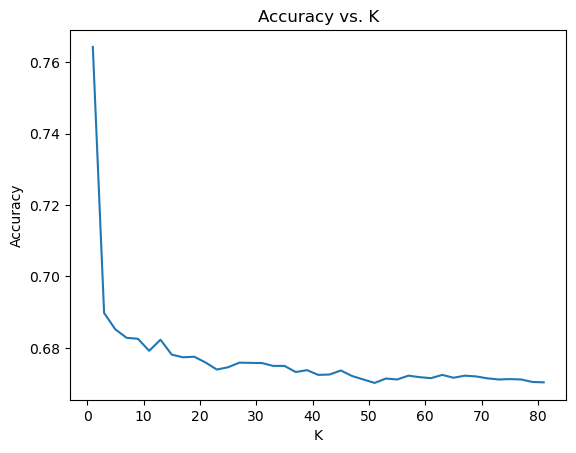

In [30]:
# Plot the accuracy scores
plt.plot(k_values, accuracies_euclidean)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K')
plt.savefig('accuracy_plot.png', dpi=300, bbox_inches='tight')
plt.show()

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81]
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
Best k value for Euclidean distance: 81
Best accuracy for Euclidean distance: 0.7280748663101604
Best k value for Cosine distance: 1
Best accuracy for Cosine distance: 0.7771657754010696


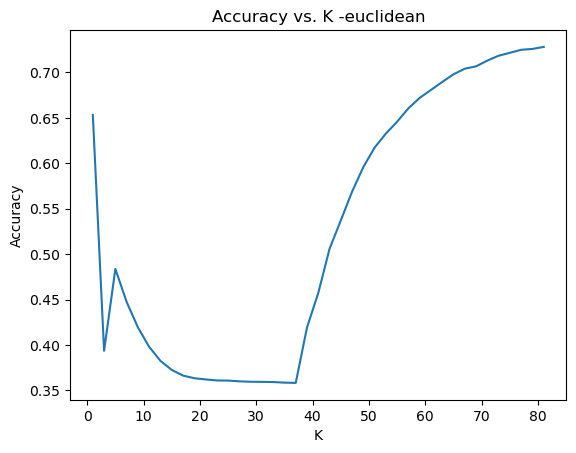

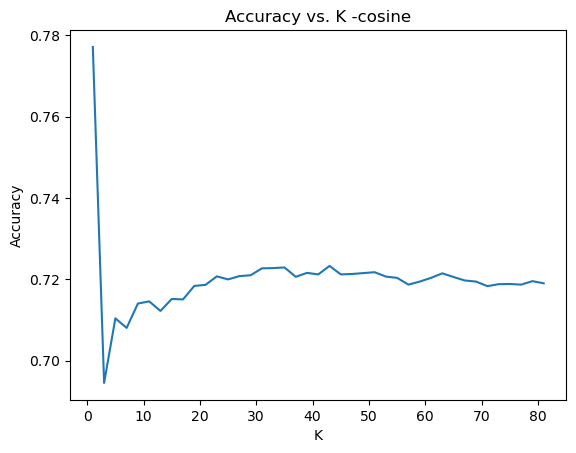

In [10]:
k_values = np.arange(1, 82, 2)  # Range of k values to consider
print(k_values, flush=True)
accuracies_euclidean = [0 for _ in range(41)]
accuracies_cosine  = [0 for _ in range(41)]

for k in k_values:
    print(k, flush=True)
    # KNN with Euclidean distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_cosine  = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn_euclidean.fit(X_train_tfidf, y_train)
    knn_cosine.fit(X_train_tfidf, y_train)
    y_pred_euclidean = knn_euclidean.predict(X_test_tfidf)
    y_pred_cosine = knn_cosine.predict(X_test_tfidf)
    accuracies_euclidean[(k - 1) // 2] = accuracy_score(y_test, y_pred_euclidean)
    accuracies_cosine[(k - 1) // 2] = accuracy_score(y_test, y_pred_cosine)

# Find the best k value for Euclidean distance
best_k_euclidean = k_values[np.argmax(accuracies_euclidean)]
best_accuracy_euclidean = max(accuracies_euclidean)
best_k_cosine = k_values[np.argmax(accuracies_cosine)]
best_accuracy_cosine = max(accuracies_cosine)

print("Best k value for Euclidean distance:", best_k_euclidean)
print("Best accuracy for Euclidean distance:", best_accuracy_euclidean)

print("Best k value for Cosine distance:", best_k_cosine)
print("Best accuracy for Cosine distance:", best_accuracy_cosine)

# Plot the accuracy scores
plt.plot(k_values, accuracies_euclidean)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K -euclidean')
plt.savefig('accuracy_plot.png', dpi=300, bbox_inches='tight')
plt.show()

plt.plot(k_values, accuracies_cosine)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K -cosine')
plt.savefig('accuracy_plot.png', dpi=300, bbox_inches='tight')
plt.show()


[ 83  85  87  89  91  93  95  97  99 101 103 105 107 109 111 113 115 117
 119 121 123 125 127 129 131 133 135 137 139 141 143 145 147 149 151]
83
85
87
89
91
93
95
97
99
101
103
105
107
109
111
113
115
117
119
121
123
125
127
129
131
133
135
137
139
141
143
145
147
149
151
Best k value for Euclidean distance: 113
Best accuracy for Euclidean distance: 0.7425133689839573


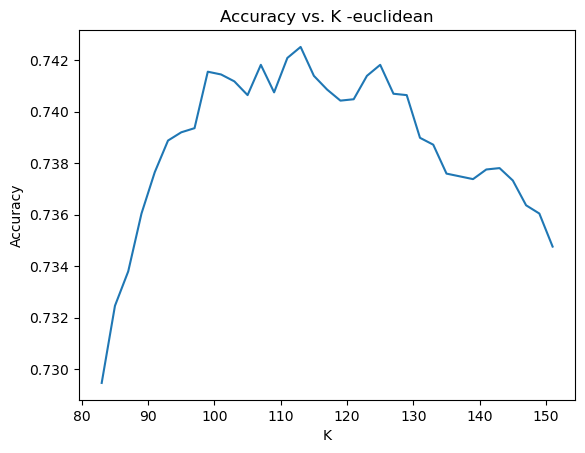

"\nplt.plot(k_values, accuracies_cosine)\nplt.xlabel('K')\nplt.ylabel('Accuracy')\nplt.title('Accuracy vs. K -cosine')\nplt.savefig('accuracy_plot.png', dpi=300, bbox_inches='tight')\nplt.show()\n"

In [10]:
k_values = np.arange(83, 152, 2)  # Range of k values to consider
print(k_values, flush=True)
accuracies_euclidean = [0 for _ in range(35)]
#accuracies_cosine  = [0 for _ in range(35)]

for k in k_values:
    print(k, flush=True)
    # KNN with Euclidean distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    #knn_cosine  = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn_euclidean.fit(X_train_tfidf, y_train)
    #knn_cosine.fit(X_train_tfidf, y_train)
    y_pred_euclidean = knn_euclidean.predict(X_test_tfidf)
    #y_pred_cosine = knn_cosine.predict(X_test_tfidf)
    accuracies_euclidean[(k - 83) // 2] = accuracy_score(y_test, y_pred_euclidean)
    #accuracies_cosine[(k - 83) // 2] = accuracy_score(y_test, y_pred_cosine)

# Find the best k value for Euclidean distance
best_k_euclidean = k_values[np.argmax(accuracies_euclidean)]
best_accuracy_euclidean = max(accuracies_euclidean)
#best_k_cosine = k_values[np.argmax(accuracies_cosine)]
#best_accuracy_cosine = max(accuracies_cosine)

print("Best k value for Euclidean distance:", best_k_euclidean)
print("Best accuracy for Euclidean distance:", best_accuracy_euclidean)

#print("Best k value for Cosine distance:", best_k_cosine)
#print("Best accuracy for Cosine distance:", best_accuracy_cosine)

# Plot the accuracy scores
plt.plot(k_values, accuracies_euclidean)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K -euclidean')
plt.savefig('accuracy_plot.png', dpi=300, bbox_inches='tight')
plt.show()
"""
plt.plot(k_values, accuracies_cosine)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K -cosine')
plt.savefig('accuracy_plot.png', dpi=300, bbox_inches='tight')
plt.show()
"""

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81]
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
Best k value for Euclidean distance: 1
Best accuracy for Euclidean distance: 0.7725668449197861


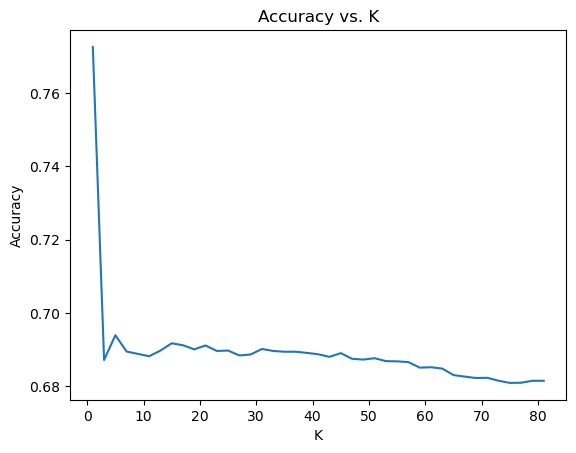

In [11]:
k_values = np.arange(1, 82 , 2)  # Range of k values to consider
print(k_values , flush = True)
accuracies_euclidean = [0 for _ in range(41)]

for k in k_values:
    print(k , flush = True)
    # KNN with Euclidean distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn_euclidean.fit(X_train_bow, y_train)
    y_pred_euclidean = knn_euclidean.predict(X_test_bow)
    accuracies_euclidean[(k-1)//2] = accuracy_score(y_test, y_pred_euclidean)
    #accuracies_euclidean.append(accuracy_euclidean)
    
# Find the best k value for Euclidean distance
best_k_euclidean = k_values[np.argmax(accuracies_euclidean)]
best_accuracy_euclidean = max(accuracies_euclidean)

print("Best k value for Euclidean distance:", best_k_euclidean)
print("Best accuracy for Euclidean distance:", best_accuracy_euclidean)

# Plot the accuracy scores
plt.plot(k_values, accuracies_euclidean)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K')
plt.savefig('accuracy_plot.png', dpi=300, bbox_inches='tight')
plt.show()

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81]
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
Best k value for Euclidean distance: 5
Best accuracy for Euclidean distance: 0.6863636363636364
Best k value for Cosine distance: 5
Best accuracy for Cosine distance: 0.6863636363636364


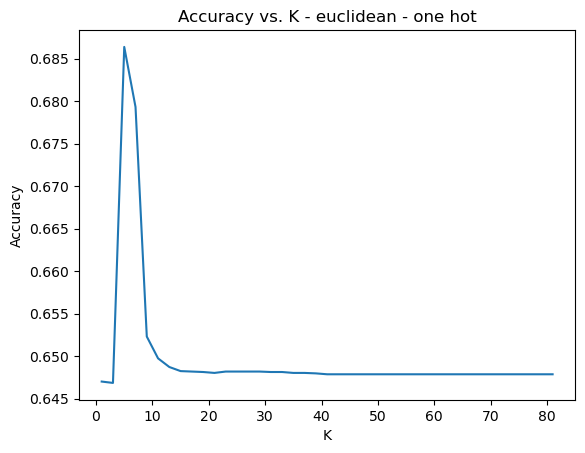

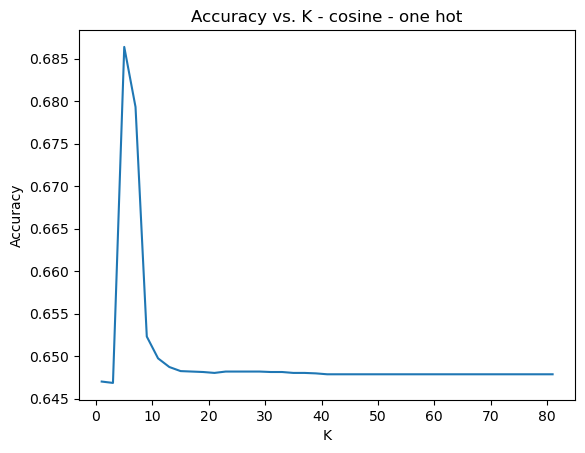

In [9]:
k_values = np.arange(1, 82, 2)  # Range of k values to consider
print(k_values, flush=True)
accuracies_euclidean = [0 for _ in range(41)]
accuracies_cosine  = [0 for _ in range(41)]

for k in k_values:
    print(k, flush=True)
    # KNN with Euclidean distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_cosine  = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn_euclidean.fit(X_train_one_hot, y_train)
    knn_cosine.fit(X_train_one_hot, y_train)
    y_pred_euclidean = knn_euclidean.predict(X_test_one_hot)
    y_pred_cosine = knn_cosine.predict(X_test_one_hot)
    accuracies_euclidean[(k - 1) // 2] = accuracy_score(y_test, y_pred_euclidean)
    accuracies_cosine[(k - 1) // 2] = accuracy_score(y_test, y_pred_cosine)

# Find the best k value for Euclidean distance
best_k_euclidean = k_values[np.argmax(accuracies_euclidean)]
best_accuracy_euclidean = max(accuracies_euclidean)
best_k_cosine = k_values[np.argmax(accuracies_cosine)]
best_accuracy_cosine = max(accuracies_cosine)

print("Best k value for Euclidean distance:", best_k_euclidean)
print("Best accuracy for Euclidean distance:", best_accuracy_euclidean)

print("Best k value for Cosine distance:", best_k_cosine)
print("Best accuracy for Cosine distance:", best_accuracy_cosine)

# Plot the accuracy scores
plt.plot(k_values, accuracies_euclidean)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K - euclidean - one hot')
plt.savefig('accuracy_plot.png', dpi=300, bbox_inches='tight')
plt.show()

plt.plot(k_values, accuracies_cosine)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K - cosine - one hot')
plt.savefig('accuracy_plot.png', dpi=300, bbox_inches='tight')
plt.show()
